## Time reversibility and Energy Conservation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t

# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t

# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
    

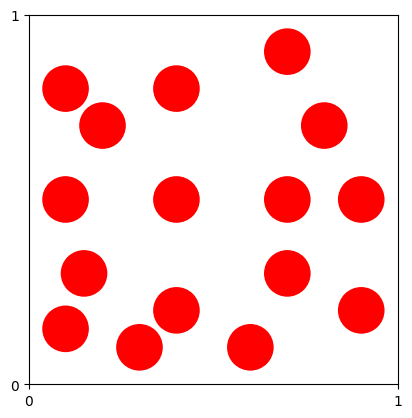

In [3]:
######################### Initialization #################################
L = 1. ## Box edge length
Natoms = 16 # Number of disks
density = 0.2 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.


## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities of disks.
# pos_initial = np.array([[0.2,0.14],[0.4,0.5],[0.15, 0.6],[0.6,0.8],[0.2,0.85]])
# vel_initial = np.array([[0.6,0.0],[0.2,1.],[0.0,0.4],[0.6,0.2],[0.3,0.3]])
pos_initial = np.array([[0.8, 0.7],
 [0.9, 0.2],
 [0.4, 0.8],
 [0.4, 0.5],
 [0.1, 0.15],
 [0.7, 0.3],
 [0.15, 0.3],
 [0.9, 0.5],
 [0.2, 0.7],
 [0.7, 0.5],
 [0.3, 0.1],
 [0.4, 0.2],
 [0.1, 0.5],
 [0.7, 0.9],
 [0.1, 0.8],
 [0.6, 0.1]])
vel_initial = np.array([[1.9, -1.5],
 [1.61, 1.76],
 [-2.4 ,2.42],
 [-2.4, 2.097],
 [1.21, 1.7],
 [-2.4, 2.41],
 [-2.44, -2.1],
 [-1.06, 1.7],
 [1.364,2.6825],
 [-0.051,-1.69],
 [2.28, 0.91],
 [-1.40, -0.814],
 [1.355,-0.89],
 [-1.10,-2.24],
 [-1.92, 2.242],
 [1.1, 1.9]])

positions = np.empty(shape=(Natoms,2),dtype = 'object')
velocities = np.empty(shape=(Natoms,2),dtype = 'object')

for i in range(Natoms):
    for j in range(2):
        a = pos_initial[i][j] 
        positions[i][j] = a
        b = vel_initial[i][j]
        velocities[i][j] = b

t = 0.0 # Initial time.
n_events = 100 # Number of collision events.
event_list = []
energy_list = []

create_picture(positions)
#################################################################################

53.28784862499992


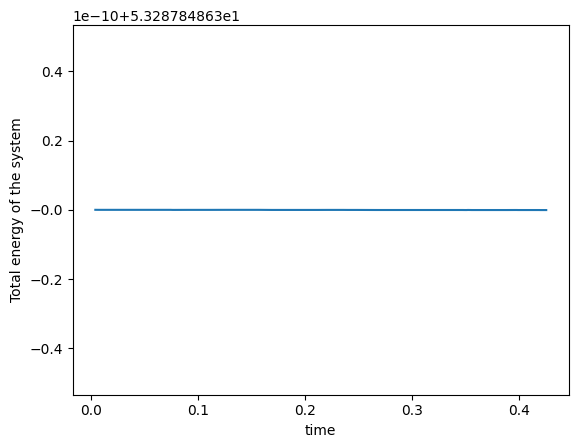

final velocities after 100 events =  [[-0.03296042810829847 0.4747852448895409]
 [-1.465634533736317 1.1769245945856774]
 [-0.47098492654430757 -0.28326439212718113]
 [0.5686793552931861 -1.388423729917137]
 [-3.499697449612841 0.09719347953182211]
 [-2.659188605621612 2.7093902636967027]
 [0.12071268639391625 -3.8222291849964964]
 [-0.6507362598040467 1.2682303547599207]
 [-1.4445938381830798 0.9325578387406106]
 [0.28911446294907406 1.9464908762456812]
 [-1.6979332180712743 -3.6317550745865517]
 [1.150533396105773 -2.3977620722295536]
 [-1.4963605397624078 1.50108880448619]
 [0.48361774451312206 2.8232549812105705]
 [-3.308409815831326 -0.9724986154161328]
 [1.0274110203082558 -1.148489611306186]]
final positions after 100 events =  [[0.9097170250340934 0.8515112300450761]
 [0.5963044842885096 0.328202587417206]
 [0.7796538258495546 0.910027958846519]
 [0.09091792198541407 0.869862412651779]
 [0.28473181113053836 0.18056172478171448]
 [0.7580623581308302 0.33606389080150006]
 [0.1139

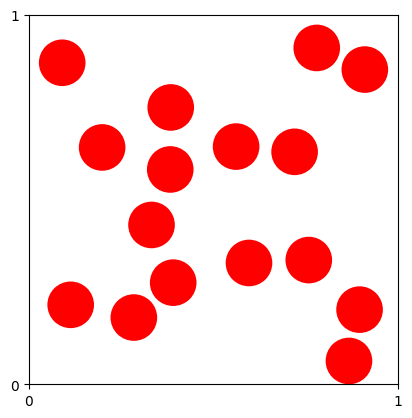

In [4]:
############### Event Loop ##############################################

for event in range(n_events):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)    
    t += next_event
    event_list.append(t)
    
    E = 0
    
    for i in range(Natoms):
        positions[i] += velocities[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp
        
    for j in range(Natoms):
        E += 0.5*(velocities[j][0]**2 + velocities[j][1]**2)
    energy_list.append(E)

print(E)
plt.plot(event_list,energy_list)
plt.xlabel("time")
plt.ylabel("Total energy of the system")
plt.show()


print('final velocities after 100 events = ',velocities)
print('final positions after 100 events = ',positions)
create_picture(positions)


##################################################################################

53.287848624999874


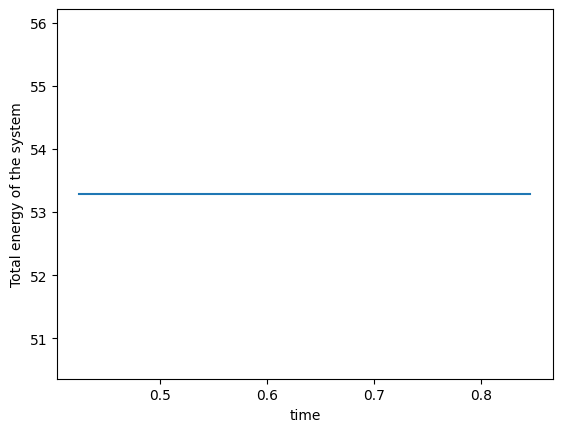

Final positions after time reversal = [[0.8000000000035417 0.6999999999982526]
 [0.8999999999956884 0.2000000000017282]
 [0.40000000000086183 0.8000000000060667]
 [0.3999999999971263 0.500000000003758]
 [0.10000000000052565 0.14999999999029767]
 [0.69999999998398 0.30000000000124505]
 [0.1499999999932813 0.3000000000003988]
 [0.8999999999957679 0.5000000000001021]
 [0.20000000000253815 0.6999999999971968]
 [0.7000000000088153 0.5000000000085565]
 [0.2999999999999829 0.09999999999734446]
 [0.4000000000015756 0.19999999999599255]
 [0.1000000000109896 0.5000000000050157]
 [0.7000000000008817 0.899999999996202]
 [0.10000000000000538 0.8000000000048675]
 [0.5999999999989928 0.10000000000342324]]
initial position = [[0.8  0.7 ]
 [0.9  0.2 ]
 [0.4  0.8 ]
 [0.4  0.5 ]
 [0.1  0.15]
 [0.7  0.3 ]
 [0.15 0.3 ]
 [0.9  0.5 ]
 [0.2  0.7 ]
 [0.7  0.5 ]
 [0.3  0.1 ]
 [0.4  0.2 ]
 [0.1  0.5 ]
 [0.7  0.9 ]
 [0.1  0.8 ]
 [0.6  0.1 ]]
Final velocities after time reversal = [[-1.8999999999544712 1.500000000

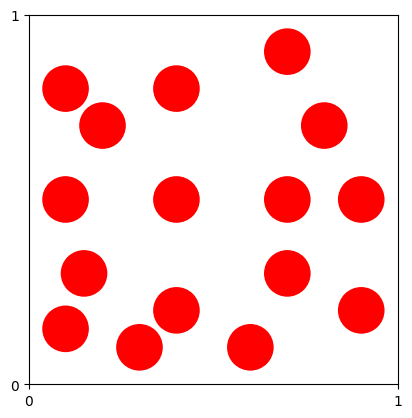

In [5]:
############################################## TIME REVERSAL ##############################################

############### Event Loop ##############################################

rev_vel = np.empty(shape = (Natoms,2),dtype = 'object')
rev_pos = np.empty(shape = (Natoms,2),dtype = 'object')
for i in range(Natoms):
    for j in range(2):
        a = positions[i][j]
        rev_pos[i][j] = a
        b = velocities[i][j]
        rev_vel[i][j] = -b
        
## To obtain the system after first event happens
# Wall collision times for all disks and their velocity components.
wall_times = [wall_time(pos_initial[i][j], vel_initial[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
# Pair collision times
pair_times = [pair_time(pos_initial[i], vel_initial[i], pos_initial[j], vel_initial[j], Ratom) for i,j in pairs] 
# The next collision event is the minimum of wall and pair collision times.
next_event = min(wall_times + pair_times)
t1 = next_event

rev_energy_list = []
rev_event_list = []

for event in range(n_events):
    # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(rev_pos[i][j], rev_vel[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times 
    # to calc times taken to collide for each ball, taking one coordinate at a time (ie j = 2) and make list
    pair_times = [pair_time(rev_pos[i], rev_vel[i], rev_pos[j], rev_vel[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times) 
    
    t += next_event
    rev_event_list.append(t)
    E = 0
 
    for i in range(Natoms):
        rev_pos[i] += rev_vel[i]*next_event # Evolve positions to collision event
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        """in the wall times list, time taken for each ball to collide with x axis walls and y axis walls is given. So first we 
        find the min time. Then to find which particle this corresponds to, we divide by 2 (as there are 2 coordinates for 
        each ball). Next, to find component we see the remainder. If remainder is 0 then x, if 1 then y."""
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        rev_vel[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = rev_pos[particle_2] - rev_pos[particle_1]
        rel_vel = rev_vel[particle_2] - rev_vel[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        rev_vel[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        rev_vel[particle_2] -= scal_prod*unit_perp
    for j in range(Natoms):
        E += 0.5*(rev_vel[j][0]**2 + rev_vel[j][1]**2)
    rev_energy_list.append(E)

print(E)
plt.plot(rev_event_list,rev_energy_list)
plt.xlabel("time")
plt.ylabel("Total energy of the system")
plt.show()


for i in range(Natoms):
    rev_pos[i] += rev_vel[i]*t1  ## To evolve position to inital condition

print('Final positions after time reversal =', rev_pos)
print('initial position =',pos_initial)

print('Final velocities after time reversal =', rev_vel)   
print('inital velocity = ',vel_initial)

create_picture(rev_pos)
##################################################################################